# **Arba Minch Tourism Prediction Challenge**
The dataset describes 6476 rows of up-to-date information on tourist expenditure collected by the National Bureau of Statistics (NBS) in Arba Minch Ethiopia.The dataset was collected to gain a better understanding of the status of the tourism sector and provide an instrument that will enable sector growth.

The objective of this hackathon is to develop a machine learning model to predict what a tourist will spend when visiting Arba Minch.The model can be used by different tour operators to automatically help tourists across the world estimate their expenditure before visiting Arba Minch.

Below is the third winning solution to the hackathon.

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading our datasets
train_df=pd.read_csv("Train.csv")
test_df=pd.read_csv("Test.csv")
sub_df=pd.read_csv("SampleSubmission.csv")
descp=pd.read_csv("VariableDefinitions.csv")

# Exploratory Data Analysis(EDA)
Here we try to understand our dataset in order to obtain insights from it so as to aid us while feature engineering our dataset

In [3]:
# checking the first five rows of our train dataset
train_df.head(100)



,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_Arba_minch,night_Gamo_Gofa,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,0.0,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,0.0,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,tour_1118,NORWAY,1-24,Friends/Relatives,4.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,6.0,Cash,Yes,"Wonderful Country, Landscape, Nature",7261380.0
96,tour_112,DENMARK,65+,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,No,Yes,Yes,No,14.0,0.0,Cash,No,Wildlife,50553750.0
97,tour_1120,NETHERLANDS,45-64,Alone,1.0,0.0,Visiting Friends and Relatives,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,15.0,0.0,Credit Card,No,Wildlife,1657500.0
98,tour_1121,UNITED KINGDOM,1-24,0.0,1.0,0.0,Volunteering,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,70.0,0.0,Cash,Yes,Wildlife,453866.0


In [4]:
train_df.count()


ID                       4809
country                  4809
age_group                4809
travel_with              4809
total_female             4809
total_male               4809
purpose                  4809
main_activity            4809
info_source              4809
tour_arrangement         4809
package_transport_int    4809
package_accomodation     4809
package_food             4809
package_transport_tz     4809
package_sightseeing      4809
package_guided_tour      4809
package_insurance        4809
night_Arba_minch         4809
night_Gamo_Gofa          4809
payment_mode             4809
first_trip_tz            4809
most_impressing          4809
total_cost               4809
dtype: int64

In [5]:
# same case for our test dataset
test_df.head()


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_Arba_minch,night_Gamo_Gofa,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Ethiopia Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [6]:
test_df.count()


ID                       1601
country                  1601
age_group                1601
travel_with              1274
total_female             1600
total_male               1599
purpose                  1601
main_activity            1601
info_source              1601
tour_arrangement         1601
package_transport_int    1601
package_accomodation     1601
package_food             1601
package_transport_tz     1601
package_sightseeing      1601
package_guided_tour      1601
package_insurance        1601
night_Arba_minch         1601
night_Gamo_Gofa          1601
payment_mode             1601
first_trip_tz            1601
most_impressing          1490
dtype: int64

In [7]:
# viewing the size of both our dataset
print(train_df.shape)
print(test_df.shape)

(4809, 23)
(1601, 22)


In [8]:
# checking if there are any missing values in our dataset
print(train_df.isnull().sum())

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_Arba_minch         0
night_Gamo_Gofa          0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64


In [9]:
# same case for our test dataset
print(test_df.isnull().sum())

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_Arba_minch           0
night_Gamo_Gofa            0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            4809 non-null   object 
 4   total_female           4809 non-null   float64
 5   total_male             4809 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1601 non-null   object 
 1   country                1601 non-null   object 
 2   age_group              1601 non-null   object 
 3   travel_with            1274 non-null   object 
 4   total_female           1600 non-null   float64
 5   total_male             1599 non-null   float64
 6   purpose                1601 non-null   object 
 7   main_activity          1601 non-null   object 
 8   info_source            1601 non-null   object 
 9   tour_arrangement       1601 non-null   object 
 10  package_transport_int  1601 non-null   object 
 11  package_accomodation   1601 non-null   object 
 12  package_food           1601 non-null   object 
 13  package_transport_tz   1601 non-null   object 
 14  package_sightseeing    1601 non-null   object 
 15  pack

In [12]:
# combining both our train and test dataset to have one that we can clean both datasets
data=pd.concat([train_df,test_df],sort=False).reset_index(drop=True)
data.columns.tolist()

['ID',
 'country',
 'age_group',
 'travel_with',
 'total_female',
 'total_male',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'night_Arba_minch',
 'night_Gamo_Gofa',
 'payment_mode',
 'first_trip_tz',
 'most_impressing',
 'total_cost']

In [13]:
# checking for missing values in our new dataset
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with               327
total_female                1
total_male                  2
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_Arba_minch            0
night_Gamo_Gofa             0
payment_mode                0
first_trip_tz               0
most_impressing           111
total_cost               1601
dtype: int64

In [14]:
# Handling the missing values by filling 'None' throughout all instances
data.travel_with.fillna('None',inplace=True)
data.most_impressing.fillna('None',inplace=True)
# Handling the missing values by filling through the mean value of the entire column
data.total_female.fillna(data.total_female.mean(),inplace = True)
data.total_male.fillna(data.total_male.mean(),inplace = True)

In [15]:
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with                 0
total_female                0
total_male                  0
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_Arba_minch            0
night_Gamo_Gofa             0
payment_mode                0
first_trip_tz               0
most_impressing             0
total_cost               1601
dtype: int64

# Feature Engineering
Here we try to come up with new features from existing ones in order to improve on the training process of our dataset


in our first feature we try to point out wether the tourist travelled into Arba Minch durring peak periods of the year such as holiday months. durring this times, tourism services are relatively expensive due to high demand.

The column on purpose of visit aids us in doing so. 

In [16]:
peak_period = []

for row in data.purpose:
  if row == 'Leisure and Holidays':
    peak_period.append(True)
  else:
    peak_period.append(False)

data['peak_period'] = peak_period

In our second feature, we try and isolate tourists from local African countries and those from other continents.
In the tourism sector, Prices for local tourists and those for international differ with great margin

In [17]:
# we obtain a list on all countries to aid us in isolating african countries
data['country'].unique()

array(['SWIZERLAND', 'UNITED KINGDOM', 'CHINA', 'SOUTH AFRICA',
       'UNITED STATES OF AMERICA', 'NIGERIA', 'INDIA', 'BRAZIL', 'CANADA',
       'MALT', 'MOZAMBIQUE', 'RWANDA', 'AUSTRIA', 'MYANMAR', 'GERMANY',
       'KENYA', 'ALGERIA', 'IRELAND', 'DENMARK', 'SPAIN', 'FRANCE',
       'ITALY', 'EGYPT', 'QATAR', 'MALAWI', 'JAPAN', 'SWEDEN',
       'NETHERLANDS', 'UAE', 'UGANDA', 'AUSTRALIA', 'YEMEN',
       'NEW ZEALAND', 'BELGIUM', 'NORWAY', 'ZIMBABWE', 'ZAMBIA', 'CONGO',
       'BURGARIA', 'PAKISTAN', 'GREECE', 'MAURITIUS', 'DRC', 'OMAN',
       'PORTUGAL', 'KOREA', 'SWAZILAND', 'TUNISIA', 'KUWAIT', 'DOMINICA',
       'ISRAEL', 'FINLAND', 'CZECH REPUBLIC', 'UKRAIN', 'ETHIOPIA',
       'BURUNDI', 'SCOTLAND', 'RUSSIA', 'GHANA', 'NIGER', 'MALAYSIA',
       'COLOMBIA', 'LUXEMBOURG', 'NEPAL', 'POLAND', 'SINGAPORE',
       'LITHUANIA', 'HUNGARY', 'INDONESIA', 'TURKEY', 'TRINIDAD TOBACCO',
       'IRAQ', 'SLOVENIA', 'UNITED ARAB EMIRATES', 'COMORO', 'SRI LANKA',
       'IRAN', 'MONTENEGRO', 

In [18]:
is_African = []
african = ['SOUTH AFRICA', 'NIGERIA', 'RWANDA', 'MOZAMBIQUE', 'KENYA', 'ALGERIA', 'EGYPT','MALAWI', 
           'UGANDA', 'ZIMBABWE', 'ZAMBIA', 'CONGO', 'MAURITIUS', 'DRC', 'TUNISIA', 'ETHIOPIA','BURUNDI',
           'GHANA', 'NIGER', 'COMORO', 'ANGOLA', 'SUDAN', 'NAMIBIA', 'LESOTHO', 'IVORY COAST', 'MADAGASCAR',
           'DJIBOUT', 'MORROCO', 'BOTSWANA', 'LIBERIA', 'GUINEA', 'SOMALI']

for country in data['country']:
  if country in african:
    is_African.append(True)
  else:
    is_African.append(False)

data['is_african'] = is_African

In [19]:
# Here we get two more features of the total number of people and the total number of nights spent
data["total_persons"] = data["total_female"] + data["total_male"]

data["total_nights_spent"] = data["night_Arba_minch"] + data["night_Gamo_Gofa"]
# data["cost_per_person"] = data['total_cost']/data['total_persons']


**Label Encoding**

We now do some encoding techniques where by we perform label encoding first.
Label encoding involves converting labels into numeric form so as to have it into a machine-readable form.

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['age_group'] = le.fit_transform(data['age_group'])
data['package_transport_int'] = le.fit_transform(data['package_transport_int'])
data['package_accomodation'] = le.fit_transform(data['package_accomodation'])
data['package_food'] = le.fit_transform(data['package_food'])
data['package_transport_tz'] = le.fit_transform(data['package_transport_tz'])
data['package_sightseeing'] = le.fit_transform(data['package_sightseeing'])
data['package_guided_tour'] = le.fit_transform(data['package_guided_tour'])
data['package_insurance'] = le.fit_transform(data['package_insurance'])
data['first_trip_tz'] = le.fit_transform(data['first_trip_tz'])
data['country'] = le.fit_transform(data['country'])
data['peak_period'] = le.fit_transform(data['peak_period'])
data['is_african'] = le.fit_transform(data['is_african'])


In [21]:
columns_to_transform = ['tour_arrangement','travel_with','purpose','main_activity','info_source','most_impressing','payment_mode']
data = pd.get_dummies( data,columns = columns_to_transform,drop_first=True)

In [22]:
data.head(5)

,ID,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,...,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque
0,tour_0,101,3,1.0,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,tour_10,111,2,1.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,tour_1000,111,2,0.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,tour_1002,111,2,1.0,1.0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4,tour_1004,17,0,1.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [23]:
import csv


In [24]:
data.to_csv("encoded_data.csv")


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   ID                                                    6410 non-null   object 
 1   country                                               6410 non-null   int32  
 2   age_group                                             6410 non-null   int32  
 3   total_female                                          6410 non-null   float64
 4   total_male                                            6410 non-null   float64
 5   package_transport_int                                 6410 non-null   int32  
 6   package_accomodation                                  6410 non-null   int32  
 7   package_food                                          6410 non-null   int32  
 8   package_transport_tz                                  6410

In [26]:
## convert float dtypes to int
data["total_female"] = data['total_female'].astype('int')
data["total_male"] = data['total_male'].astype('int')
data["night_Arba_minch"] = data['night_Arba_minch'].astype('int')
data["night_Gamo_Gofa"] = data['night_Gamo_Gofa'].astype('int')

In [27]:
## separate data into train and test
train_df=data[data.total_cost.notnull()].reset_index(drop=True)
test_df=data[data.total_cost.isna()].reset_index(drop=True)

In [28]:
print(train_df.shape)
print(test_df.shape)

(4809, 59)
(1601, 59)


# Modelling
Here is where we create a model that we'll train on with our training set so as to aid us in making our desired predictions.
we notice that we our hackathon is a linear regression problem hence we'll need to use a regression algorithm to solve it.
we used a catboost Regressor model to train and give our prediction.


In [29]:

feat_cols = train_df.drop(["ID","total_cost"],1)
cols = feat_cols.columns
target=train_df["total_cost"]

C:\Users\t\AppData\Local\Temp\ipykernel_13604\4158113384.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  feat_cols = train_df.drop(["ID","total_cost"],1)


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

In [31]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(train_df[cols],target, test_size=0.25, random_state = 42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3606, 57) (3606,)
(1203, 57) (1203,)


checking if there are duplicated files

In [32]:
data.duplicated().sum()


0

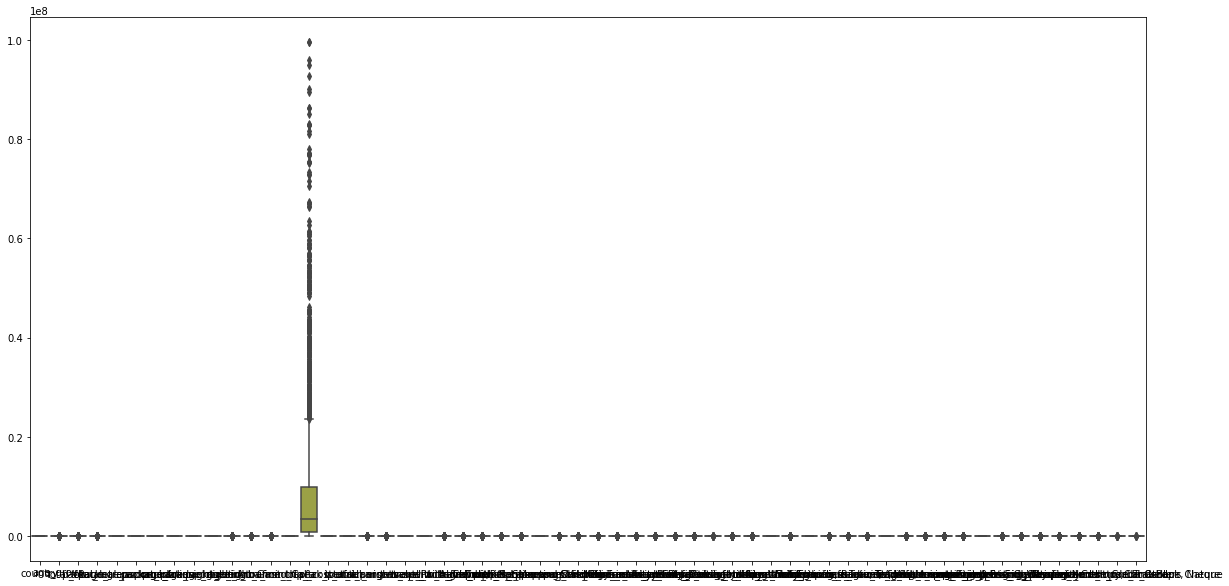

In [33]:
plt.figure(figsize=(20, 10), facecolor='w')
sns.boxplot(data=data)
plt.show()


The above graph shows we have a stable data. Except for Total Cost but It is meant to be that way so we will not remove it

In [34]:
data['total_cost'].max()


99532875.0

In [35]:
data['total_cost'].mean()

8114388.777617801

In [36]:
data['total_cost'].min()


49000.0

,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,...,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque
country,1.000000,-0.001190,-0.079837,0.001203,-0.137430,-0.122153,-0.111280,-0.095933,-0.059152,-0.087682,...,-0.067542,0.054493,0.001182,-0.006399,0.042166,0.005800,-0.051420,-0.014538,-0.013994,-0.002723
age_group,-0.001190,1.000000,0.039793,0.076685,0.177475,0.170416,0.161986,0.182584,0.190039,0.174089,...,0.012817,0.043239,-0.066067,-0.027234,-0.006648,0.028993,-0.045919,0.143437,0.020322,0.011682
total_female,-0.079837,0.039793,1.000000,0.414562,0.181054,0.190490,0.173629,0.168254,0.151955,0.146324,...,0.014141,-0.009684,-0.014487,-0.020794,-0.026376,-0.006547,0.018573,0.022468,0.008160,0.009098
total_male,0.001203,0.076685,0.414562,1.000000,0.090986,0.048610,0.032870,0.041148,0.039490,0.032459,...,0.017284,-0.017046,-0.024657,0.008032,0.004763,0.010504,-0.005540,0.003800,-0.006644,-0.004348
package_transport_int,-0.137430,0.177475,0.181054,0.090986,1.000000,0.673831,0.624054,0.591270,0.416871,0.424230,...,0.028799,-0.053244,-0.004379,-0.027798,-0.030751,0.000485,-0.001948,0.055507,0.007813,0.005388
package_accomodation,-0.122153,0.170416,0.190490,0.048610,0.673831,1.000000,0.923149,0.851816,0.711443,0.725059,...,0.002929,-0.063770,0.005641,-0.092282,-0.068912,-0.003281,0.026191,0.026702,0.007391,-0.005804
package_food,-0.111280,0.161986,0.173629,0.032870,0.624054,0.923149,1.000000,0.824724,0.672716,0.700402,...,0.008260,-0.065679,0.004603,-0.084786,-0.059414,0.001137,0.023235,0.024596,0.002991,-0.012765
package_transport_tz,-0.095933,0.182584,0.168254,0.041148,0.591270,0.851816,0.824724,1.000000,0.695979,0.697685,...,0.004302,-0.047394,0.000344,-0.102809,-0.059866,-0.013398,0.029053,0.019647,0.006491,-0.010232
package_sightseeing,-0.059152,0.190039,0.151955,0.039490,0.416871,0.711443,0.672716,0.695979,1.000000,0.790568,...,-0.001248,-0.055070,0.004045,-0.120742,-0.067864,-0.008761,0.013236,0.017525,-0.000041,0.005121
package_guided_tour,-0.087682,0.174089,0.146324,0.032459,0.424230,0.725059,0.700402,0.697685,0.790568,1.000000,...,-0.001215,-0.060577,0.015182,-0.098899,-0.067876,-0.014889,0.017808,0.019779,-0.023452,0.013684


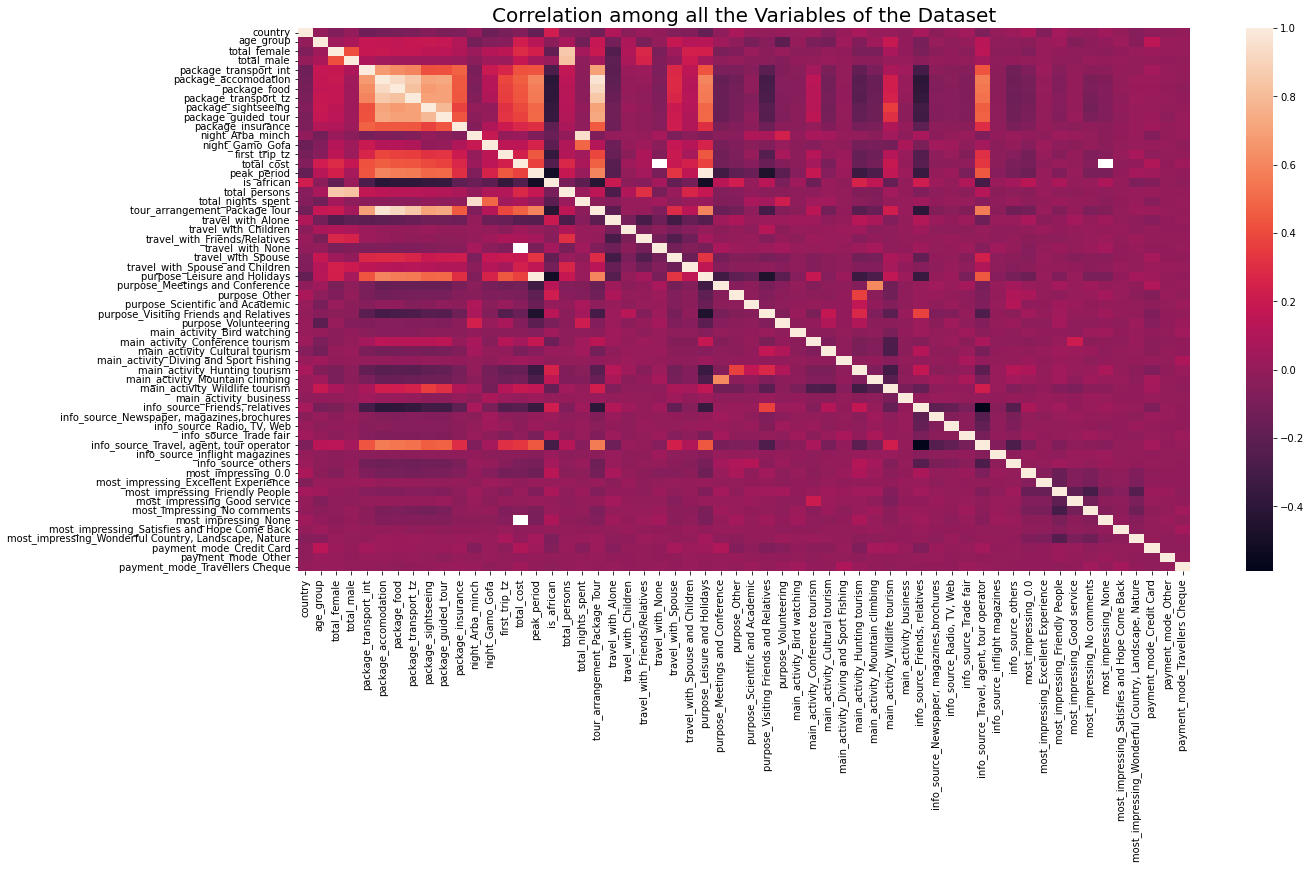

In [37]:
cor = data.corr()
plt.figure(figsize=(20, 10), facecolor='w')
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=False)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor


This graph shows the relation between all columns to eachother

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   ID                                                    6410 non-null   object 
 1   country                                               6410 non-null   int32  
 2   age_group                                             6410 non-null   int32  
 3   total_female                                          6410 non-null   int32  
 4   total_male                                            6410 non-null   int32  
 5   package_transport_int                                 6410 non-null   int32  
 6   package_accomodation                                  6410 non-null   int32  
 7   package_food                                          6410 non-null   int32  
 8   package_transport_tz                                  6410

In [39]:
categorical_features = ['total_cost', 'age_group', 'night_Arba_minch', 'night_Gamo_Gofa', 'total_persons']

for feature in categorical_features:
    print(feature, ':')
    print(data[feature].value_counts())
    print("-----------------")


total_cost :
1657500.0     154
3315000.0     109
828750.0       88
497250.0       76
331500.0       76
             ... 
240337.5        1
2361937.5       1
425000.0        1
37956750.0      1
2246636.7       1
Name: total_cost, Length: 1637, dtype: int64
-----------------
age_group :
2    3353
3    1838
0     624
4     393
1     202
Name: age_group, dtype: int64
-----------------
night_Arba_minch :
0      737
2      572
7      552
3      540
4      494
      ... 
120      1
66       1
54       1
41       1
57       1
Name: night_Arba_minch, Length: 69, dtype: int64
-----------------
night_Gamo_Gofa :
0      4018
7       489
4       378
3       356
5       315
6       243
2       155
10       76
14       73
1        65
9        53
11       38
12       34
13       30
15       26
17       10
19        6
30        5
20        5
16        4
25        4
21        3
22        3
43        3
23        3
60        2
27        2
26        2
35        1
24        1
33        1
50        1
61     

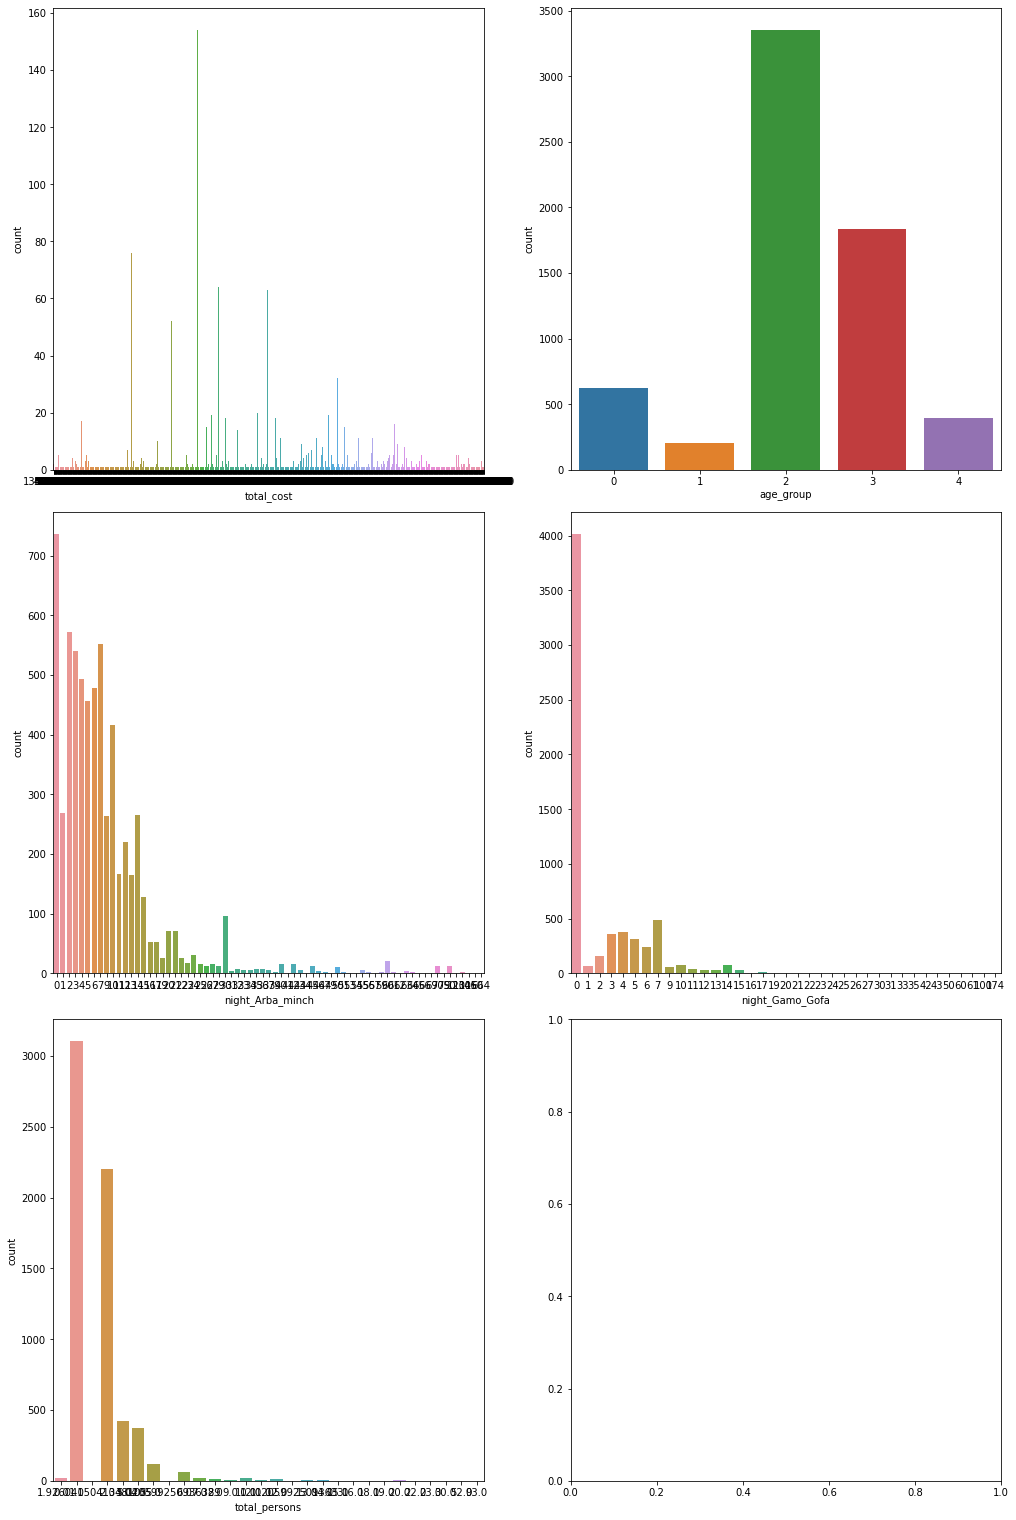

In [40]:
num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=data, ax=axs[row][pos])


C:\Users\t\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


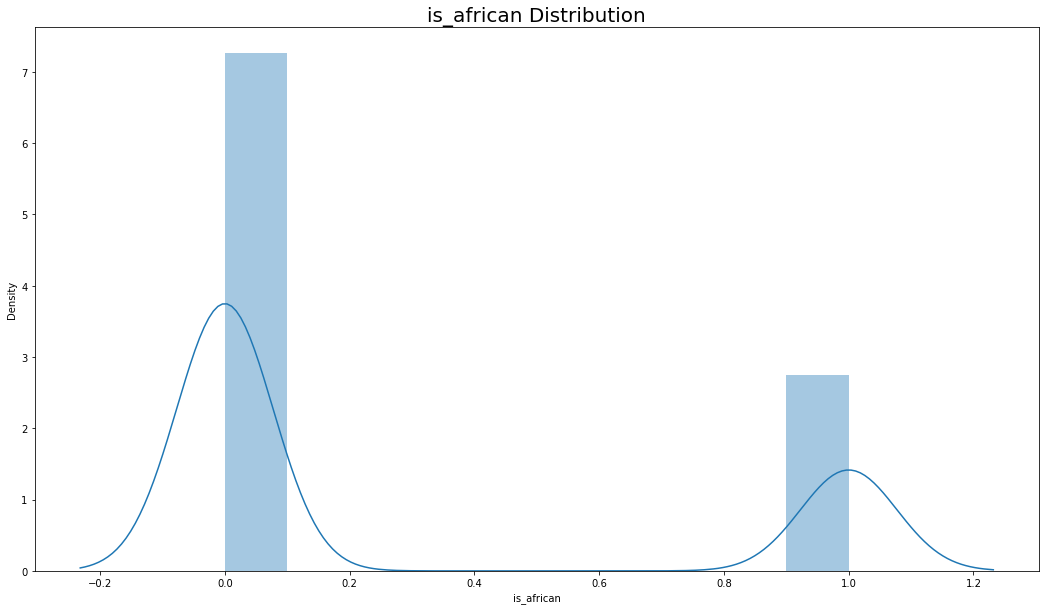

C:\Users\t\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


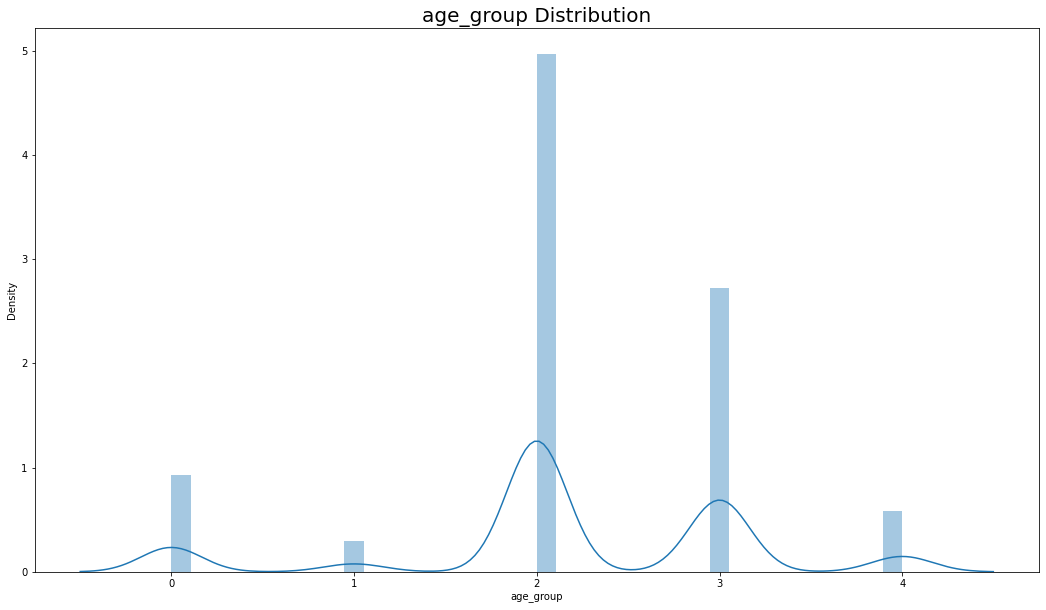

C:\Users\t\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


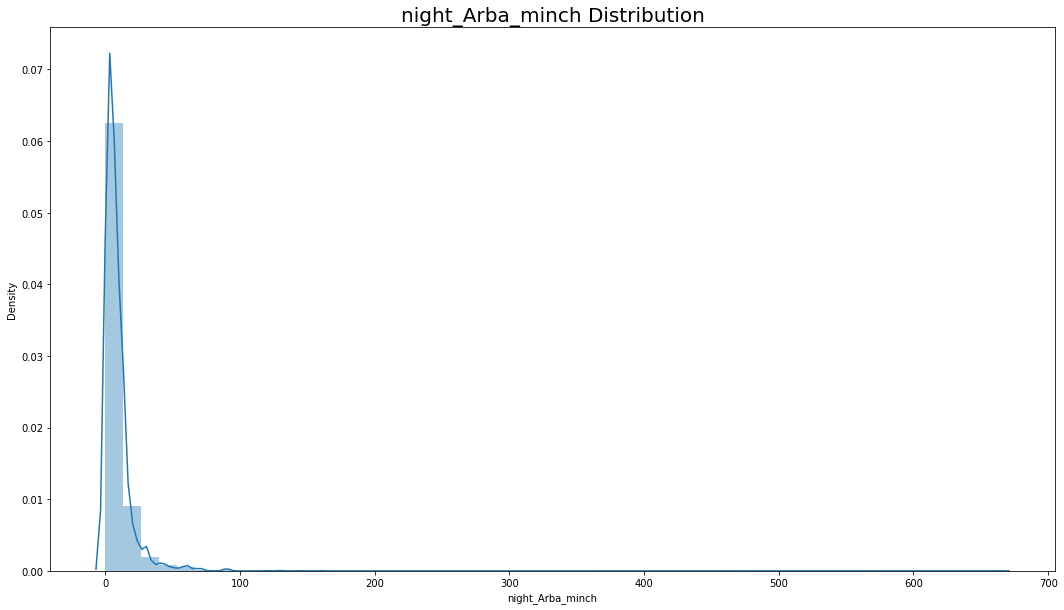

C:\Users\t\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


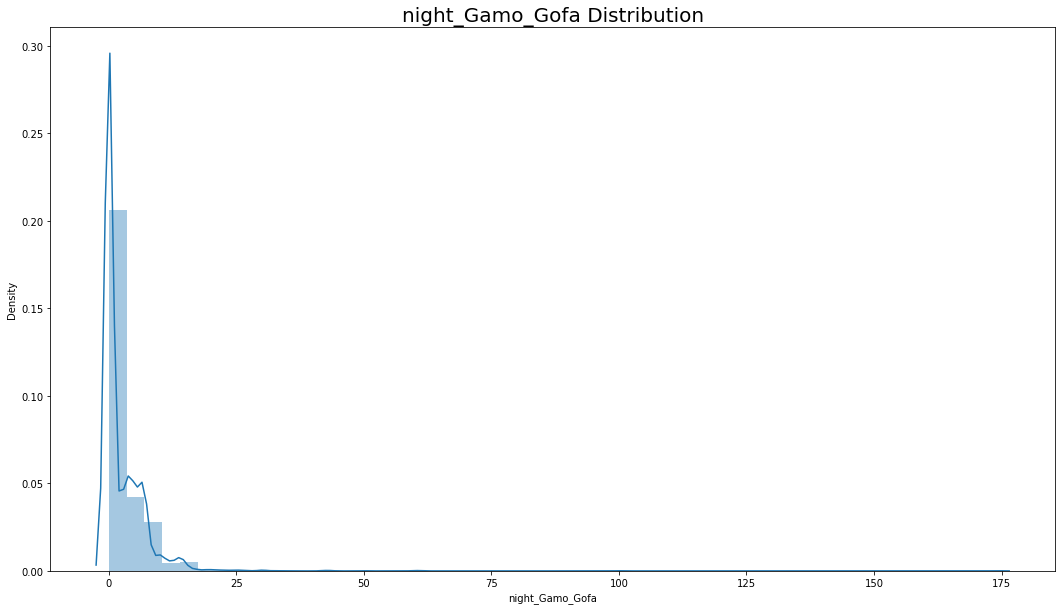

C:\Users\t\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


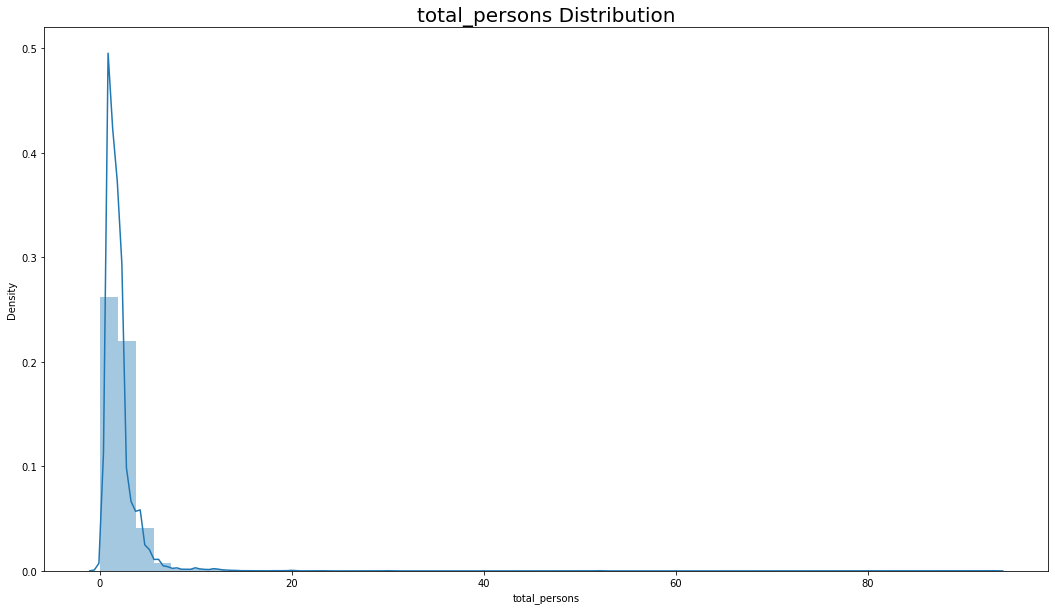

In [41]:
numeric_features = ['is_african', 'age_group',
                    'night_Arba_minch', 'night_Gamo_Gofa', 'total_persons']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(data[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()


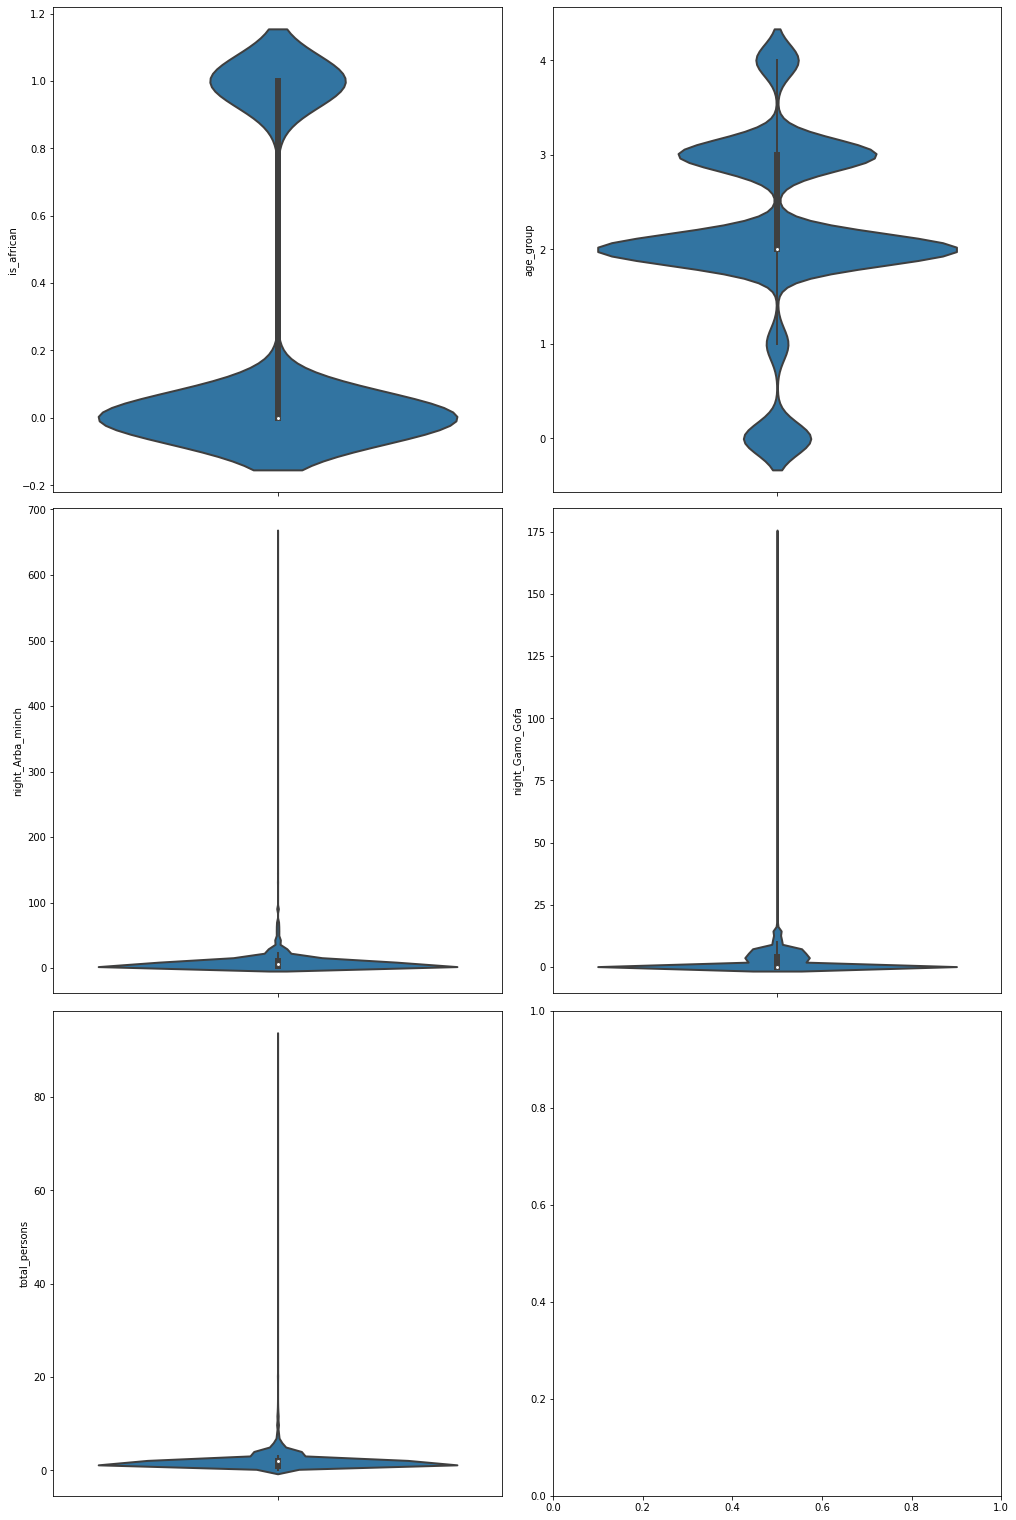

In [42]:
num_plots = len(numeric_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
color = ['m', 'g', 'b', 'r', 'y', 'v', 'o']
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(numeric_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.violinplot(y=var, data=data, ax=axs[row][pos], linewidth=2)


In [43]:
graph_1 = data.groupby("is_african", as_index=False).total_cost.mean()


(array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.,
        12000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

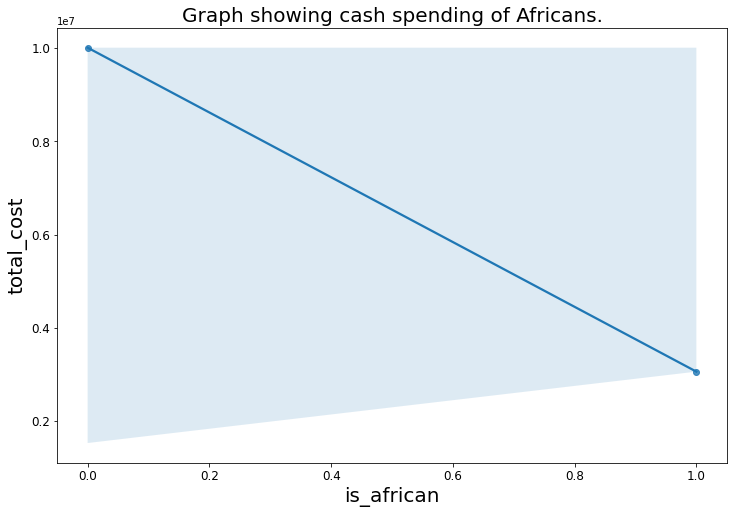

In [44]:
plt.figure(figsize=(12, 8), facecolor='w')
sns.regplot(x=graph_1["is_african"], y=graph_1["total_cost"])
plt.title("Graph showing cash spending of Africans.", size=20)
plt.xlabel("is_african", size=20)
plt.ylabel("total_cost", size=20)
plt.xticks(size=12)
plt.yticks(size=12)


Graph shows Africans don't spend that much money

In [45]:
graph_2 = data.groupby("total_male", as_index=False).age_group.sum()



(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

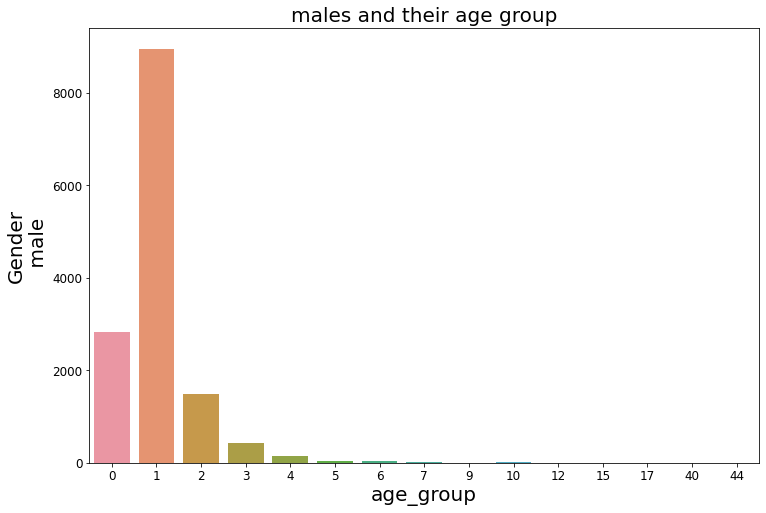

In [46]:

plt.figure(figsize=(12, 8), facecolor='w')
sns.barplot(x=graph_2["total_male"], y=graph_2["age_group"])
plt.title(
    "males and their age group", size=20)
plt.ylabel("Gender\n male", size=20)
plt.xlabel("age_group", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

In [47]:
graph_3 = data.groupby("total_female", as_index=False).age_group.sum()

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

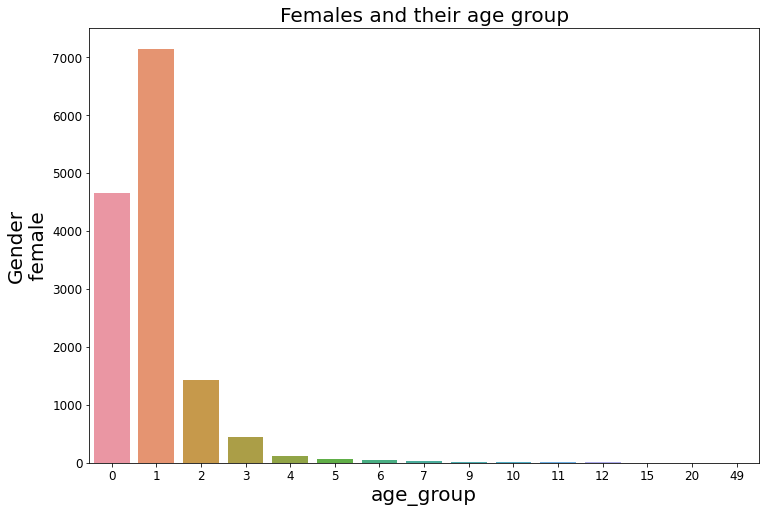

In [48]:
plt.figure(figsize=(12, 8), facecolor='w')
sns.barplot(x=graph_3["total_female"], y=graph_3["age_group"])
plt.title(
    "Females and their age group", size=20)
plt.ylabel("Gender\n female ", size=20)
plt.xlabel("age_group", size=20)
plt.xticks(size=12)
plt.yticks(size=12)


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   ID                                                    6410 non-null   object 
 1   country                                               6410 non-null   int32  
 2   age_group                                             6410 non-null   int32  
 3   total_female                                          6410 non-null   int32  
 4   total_male                                            6410 non-null   int32  
 5   package_transport_int                                 6410 non-null   int32  
 6   package_accomodation                                  6410 non-null   int32  
 7   package_food                                          6410 non-null   int32  
 8   package_transport_tz                                  6410

Predictive Modeling
We use the following different machine learning models for the dataset:

1. Logistic Regressor
2. K-Nearest Neighbour Classifier
3. Random Forest Classifier
4. Decision Tree Classifier
5. Gradient Boosting Classifier

In [50]:
data.isnull().sum()


ID                                                         0
country                                                    0
age_group                                                  0
total_female                                               0
total_male                                                 0
package_transport_int                                      0
package_accomodation                                       0
package_food                                               0
package_transport_tz                                       0
package_sightseeing                                        0
package_guided_tour                                        0
package_insurance                                          0
night_Arba_minch                                           0
night_Gamo_Gofa                                            0
first_trip_tz                                              0
total_cost                                              1601
peak_period             

In [51]:
data=pd.read_csv('cleaned_data.csv')


In [52]:
# sns.lmplot('total_female', 'total_male',
#            data=data,
#            hue="total_cost",
#            col="night_Arba_minch", row="night_Gamo_Gofa")
# plt.show()


In [53]:
# data.drop('SelectKBest', axis=1, inplace=True)
data = data.fillna(0)
X = data.iloc[:, 0:47]
y = data.iloc[:, -1]
print("X - ", X.shape, "\ny - ", y.shape)


X -  (6410, 47) 
y -  (6410,)


In [54]:
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, recall_score, roc_curve, classification_report, precision_score, f1_score
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Ensembling


In [55]:

#Apply SelectKBest and extract top 10 features
best = SelectKBest(score_func=chi2, k=10)


In [56]:
fit = best.fit(X, y)

data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(X.columns)


In [57]:

#Join the two dataframes
scores = pd.concat([data_columns, data_scores], axis=1)
scores.columns = ['Feature', 'Score']
print(scores.nlargest(20, 'Score'))


                                   Feature         Score
16                              total_cost  1.273448e+08
1                                       ID  1.294683e+03
0                               Unnamed: 0  7.414250e+02
36  main_activity_Diving and Sport Fishing  5.149966e+01
13                        night_Arba_minch  4.361495e+01
20                      total_nights_spent  1.725590e+01
14                         night_Gamo_Gofa  1.331176e+01
33             main_activity_Bird watching  1.292148e+01
44                  info_source_Trade fair  5.628884e+00
30         purpose_Scientific and Academic  5.493811e+00
12                       package_insurance  2.667536e+00
32                    purpose_Volunteering  2.610066e+00
18                              is_african  2.195564e+00
37           main_activity_Hunting tourism  2.025316e+00
2                                  country  9.335851e-01
4                             total_female  9.049275e-01
39          main_activity_Wildl

In [58]:
data = data[['total_cost', 'main_activity_Diving and Sport Fishing', 'package_insurance',
             'total_nights_spent', 'main_activity_Bird watching', 'info_source_Trade fair', 'purpose_Scientific and Academic',
              'purpose_Volunteering', 'is_african', 'main_activity_Hunting tourism', 'country', 'total_female', 'main_activity_Wildlife tourism', 
              'package_guided_tour', 'main_activity_Cultural tourism', 'package_food']]
data.head()


,total_cost,main_activity_Diving and Sport Fishing,package_insurance,total_nights_spent,main_activity_Bird watching,info_source_Trade fair,purpose_Scientific and Academic,purpose_Volunteering,is_african,main_activity_Hunting tourism,country,total_female,main_activity_Wildlife tourism,package_guided_tour,main_activity_Cultural tourism,package_food
0,674602.5,0,0,13.0,0,0,0,0,0,0,101,1.0,1,0,0,0
1,3214906.5,0,0,21.0,0,0,0,0,0,0,111,1.0,0,0,1,0
2,3315000.0,0,0,32.0,0,0,0,0,0,0,111,0.0,0,0,1,0
3,7790250.0,0,0,11.0,0,0,0,0,0,0,111,1.0,1,1,0,1
4,1657500.0,0,0,11.0,0,0,0,0,0,0,17,1.0,1,0,0,0


In [107]:
y = data['is_african']
X = data.drop(['is_african'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=5)


In [108]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [109]:
m1 = 'LogisticRegression'
lr = LogisticRegression()
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
lr_r2_score = r2_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",(lr_acc_score*100),"%",'\n')
print(classification_report(test_y,lr_predict))

confussion matrix
[[822  95]
 [152 213]]


Accuracy of Logistic Regression: 80.73322932917316 % 

R2 score: 0.053931073632004334 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       917
           1       0.69      0.58      0.63       365

    accuracy                           0.81      1282
   macro avg       0.77      0.74      0.75      1282
weighted avg       0.80      0.81      0.80      1282



Text(0.5, 1.0, 'Accuracy Score: 0.8073322932917316')

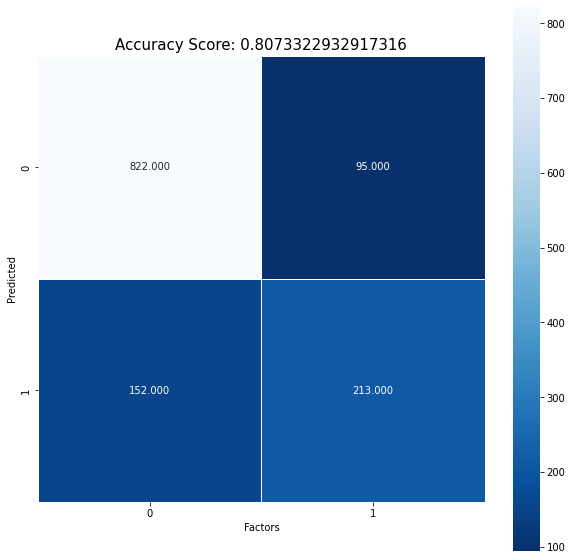

In [120]:
plt.figure(figsize=(10, 10))
sns.heatmap(lr_conf_matrix, annot=True, fmt=".3f",
            linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Predicted')
plt.xlabel('Factors')
all_sample_title = 'Accuracy Score: {0}'.format(lr_acc_score)
plt.title(all_sample_title, size=15)


In [121]:
print(lr_predict)

[0 1 0 ... 0 1 0]


In [122]:
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier()
model = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
knn_r2_score = r2_score(test_y, knn_predict)

print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:", knn_acc_score*100, '\n')

print("R2 score of k-NN Classification:", knn_r2_score*100, '\n')

print(classification_report(test_y, knn_predict))


confussion matrix
[[867  50]
 [ 43 322]]


Accuracy of k-NN Classification: 92.74570982839313 

R2 score of k-NN Classification: 64.37878131488924 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       917
           1       0.87      0.88      0.87       365

    accuracy                           0.93      1282
   macro avg       0.91      0.91      0.91      1282
weighted avg       0.93      0.93      0.93      1282



Text(0.5, 1.0, 'Accuracy Score: 0.9274570982839313')

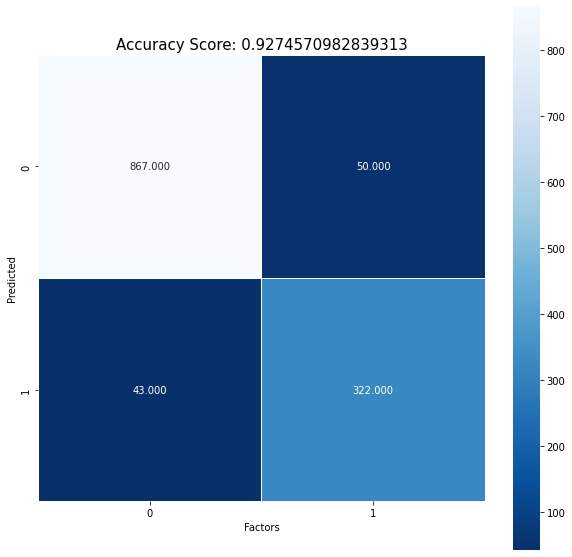

In [123]:
plt.figure(figsize=(10, 10))
sns.heatmap(knn_conf_matrix, annot=True, fmt=".3f",
            linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Predicted')
plt.xlabel('Factors')
all_sample_title = 'Accuracy Score: {0}'.format(knn_acc_score)
plt.title(all_sample_title, size=15)


In [124]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier()
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confussion matrix
[[889  28]
 [ 46 319]]


Accuracy of Random Forest: 94.22776911076443 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       917
           1       0.92      0.87      0.90       365

    accuracy                           0.94      1282
   macro avg       0.94      0.92      0.93      1282
weighted avg       0.94      0.94      0.94      1282



Text(0.5, 1.0, 'Accuracy Score: 0.9422776911076443')

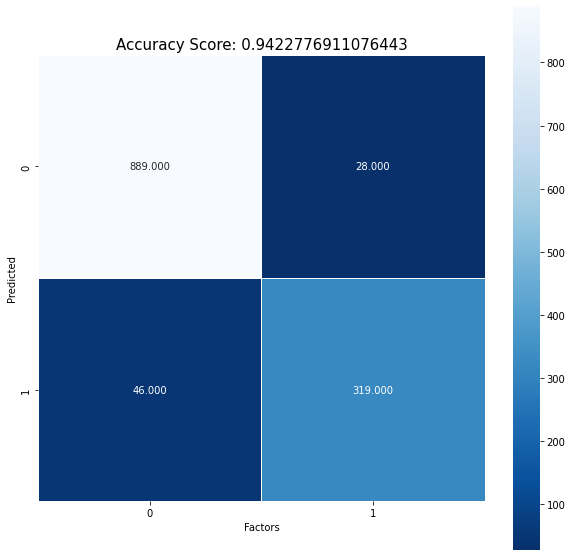

In [125]:
plt.figure(figsize=(10, 10))
sns.heatmap(rf_conf_matrix, annot=True, fmt=".3f",
            linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Predicted')
plt.xlabel('Factors')
all_sample_title = 'Accuracy Score: {0}'.format(rf_acc_score)
plt.title(all_sample_title, size=15)


In [126]:
print(rf_predicted)

[0 1 0 ... 0 1 0]


In [127]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier()
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))



confussion matrix
[[908   9]
 [ 11 354]]


Accuracy of DecisionTreeClassifier: 98.4399375975039 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       917
           1       0.98      0.97      0.97       365

    accuracy                           0.98      1282
   macro avg       0.98      0.98      0.98      1282
weighted avg       0.98      0.98      0.98      1282



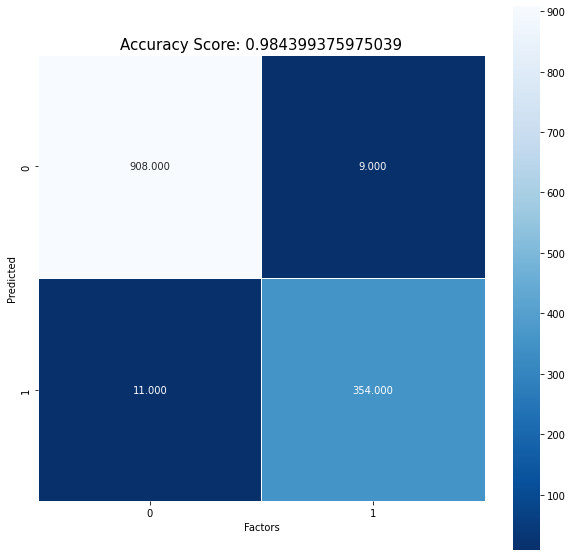

In [128]:
plt.figure(figsize=(10,10))
sns.heatmap(dt_conf_matrix, annot=True, fmt=".3f",
            linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Predicted');
plt.xlabel('Factors');
all_sample_title = 'Accuracy Score: {0}'.format(dt_acc_score)
plt.title(all_sample_title, size = 15);

In [129]:

m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x,train_y)
gvc_predicted = gvc.predict(test_x)
gvc_conf_matrix = confusion_matrix(test_y, gvc_predicted)
gvc_acc_score = accuracy_score(test_y, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y,gvc_predicted))

confussion matrix
[[916   1]
 [ 14 351]]


Accuracy of Gradient Boosting Classifier: 98.82995319812792 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       917
           1       1.00      0.96      0.98       365

    accuracy                           0.99      1282
   macro avg       0.99      0.98      0.99      1282
weighted avg       0.99      0.99      0.99      1282



Text(0.5, 1.0, 'Accuracy Score: 0.9882995319812793')

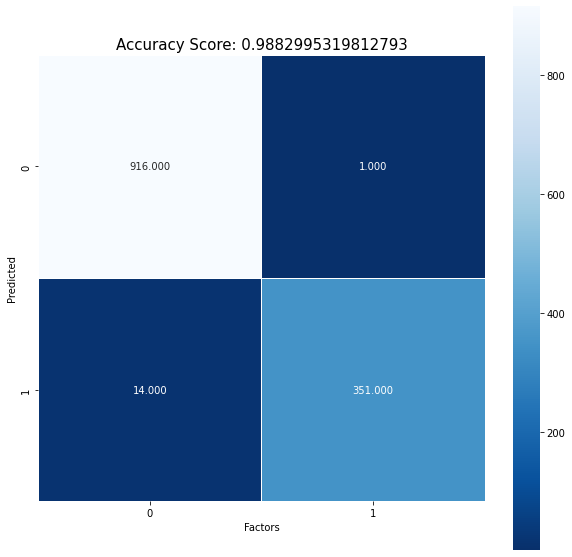

In [130]:
plt.figure(figsize=(10, 10))
sns.heatmap(gvc_conf_matrix, annot=True, fmt=".3f",
            linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Predicted')
plt.xlabel('Factors')
all_sample_title = 'Accuracy Score: {0}'.format(gvc_acc_score)
plt.title(all_sample_title, size=15)


In [131]:
import pickle

In [ ]:
filename= 'predict.sav'
pickle.dump(gvc_predicted, open(filename,'wb'))